In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:

# Load the dataset
df = pd.read_csv("../dataset/Raw_data.csv")

In [4]:
# Display the number of rows and columns in the dataset

df.shape

(7200, 7)

In [5]:
# Display concise summary of the DataFrame (column names, non-null counts, data types, memory usage)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           7200 non-null   object 
 1   Building_ID         7200 non-null   object 
 2   Energy_Usage (kWh)  7200 non-null   float64
 3   Temperature (°C)    7200 non-null   float64
 4   Humidity (%)        7200 non-null   float64
 5   Building_Type       7200 non-null   object 
 6   Occupancy_Level     7200 non-null   object 
dtypes: float64(3), object(4)
memory usage: 393.9+ KB


In [6]:
# Check how many missing (NaN) values exist in each column

df.isnull().sum()

Timestamp             0
Building_ID           0
Energy_Usage (kWh)    0
Temperature (°C)      0
Humidity (%)          0
Building_Type         0
Occupancy_Level       0
dtype: int64

In [7]:
# Check how many duplicate rows are present in the dataset

df.duplicated().sum()


np.int64(0)

In [8]:

# Display statistical summary (mean, std, min, max, etc.) for numerical columns, transposed for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy_Usage (kWh),7200.0,277.869099,129.693860,50.05,165.9650,279.41,387.5275,499.92
Temperature (°C),7200.0,12.450781,13.033681,-9.99,1.0175,12.55,23.7725,35.00
Humidity (%),7200.0,59.826208,17.275891,30.00,44.9575,59.67,74.8600,89.99


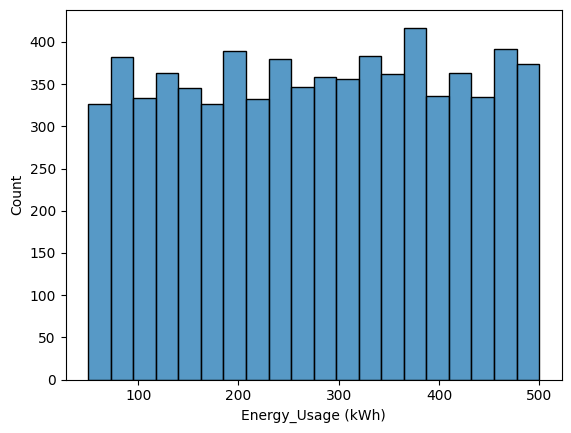

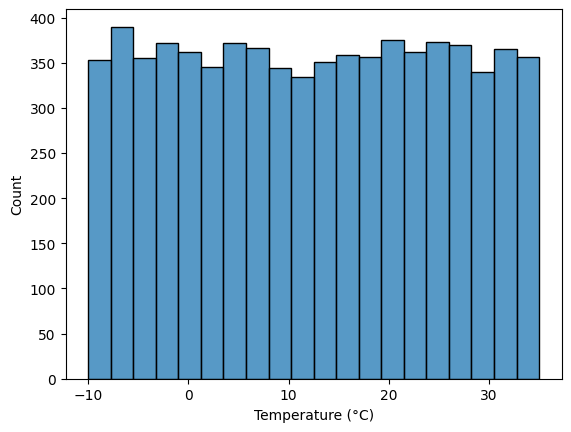

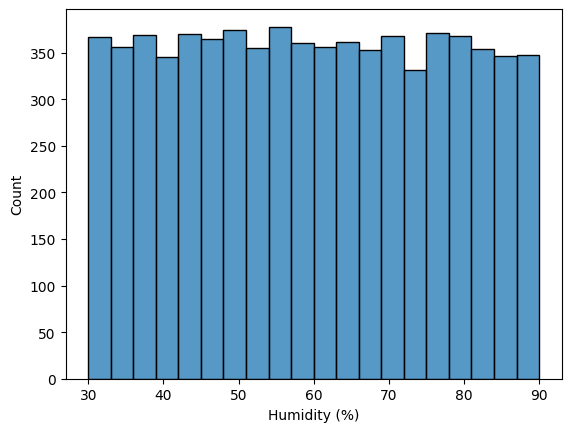

In [9]:
# Plot histograms for all numerical columns to visualize their distribution

for col in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=df[col])
    plt.show()

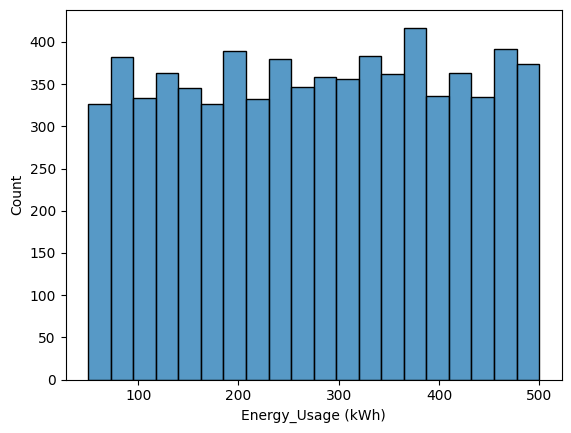

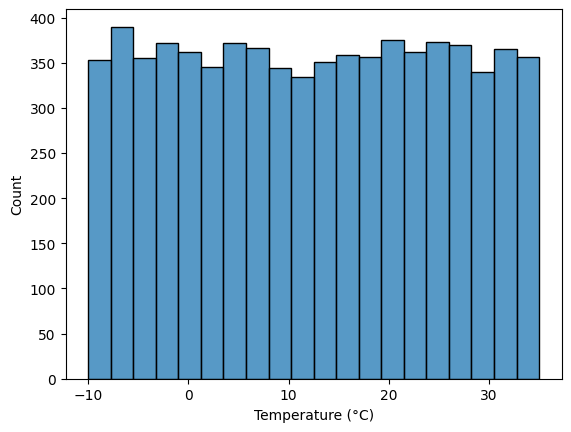

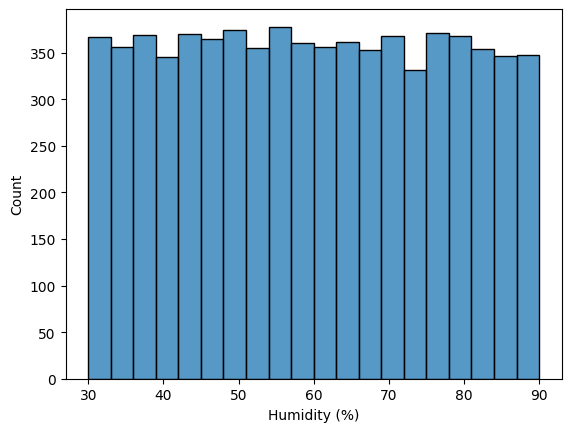

In [10]:
# Plot histograms for all numerical columns to visualize their distribution

for col in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=df[col])
    plt.show()

In [11]:
# Define a function to calculate lower and upper whisker boundaries for detecting outliers using IQR
def wisker(col):
    col=col.dropna()
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw


In [12]:
# Detect and count outliers for each numerical column using the whisker limits
for col in df.select_dtypes(include="number").columns:
    lw,uw=wisker(df[col])
    outliers1=df[(df[col]<lw)|(df[col]>uw)]
    print(outliers1.shape[0])# Print how many outliers are found in each column

0
0
0


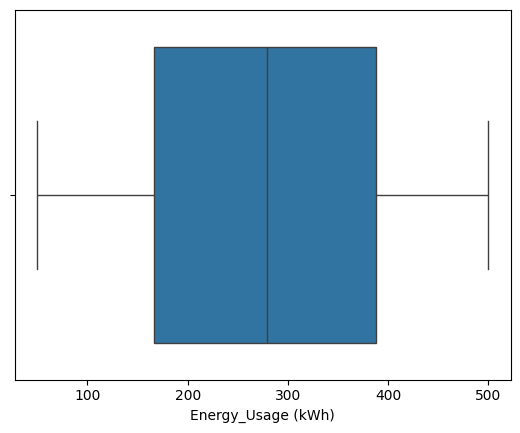

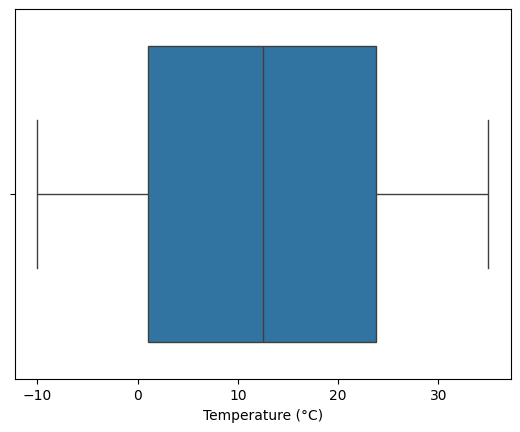

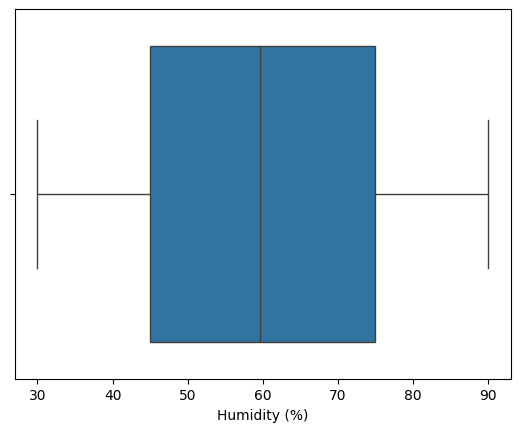

In [13]:
# Plot boxplots for each numerical column to visualize outliers and data spread
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=col)
    plt.show()
 

In [14]:
# df.select_dtypes(include="number")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           7200 non-null   object 
 1   Building_ID         7200 non-null   object 
 2   Energy_Usage (kWh)  7200 non-null   float64
 3   Temperature (°C)    7200 non-null   float64
 4   Humidity (%)        7200 non-null   float64
 5   Building_Type       7200 non-null   object 
 6   Occupancy_Level     7200 non-null   object 
dtypes: float64(3), object(4)
memory usage: 393.9+ KB


In [15]:
print(df.columns.tolist())


['Timestamp', 'Building_ID', 'Energy_Usage (kWh)', 'Temperature (°C)', 'Humidity (%)', 'Building_Type', 'Occupancy_Level']


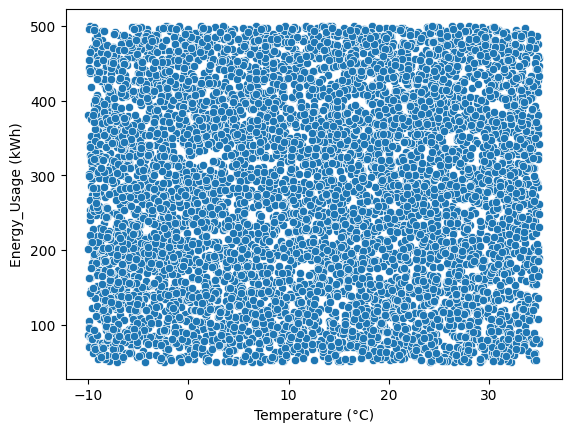

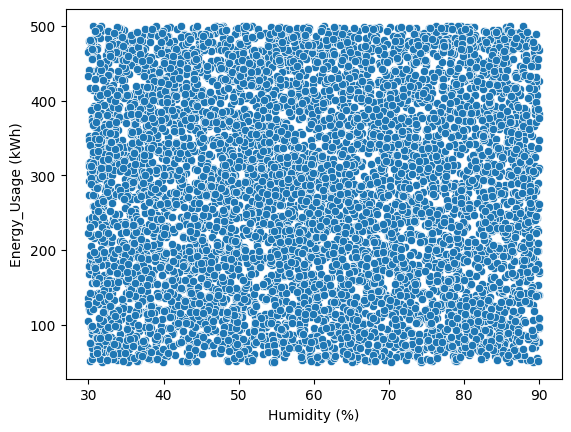

In [16]:
# Plot scatter plots to analyze relationship between temperature/humidity and energy usage
for col in ['Temperature (°C)','Humidity (%)']:
    sns.scatterplot(data=df,x=col,y='Energy_Usage (kWh)')
    plt.show()

<Axes: >

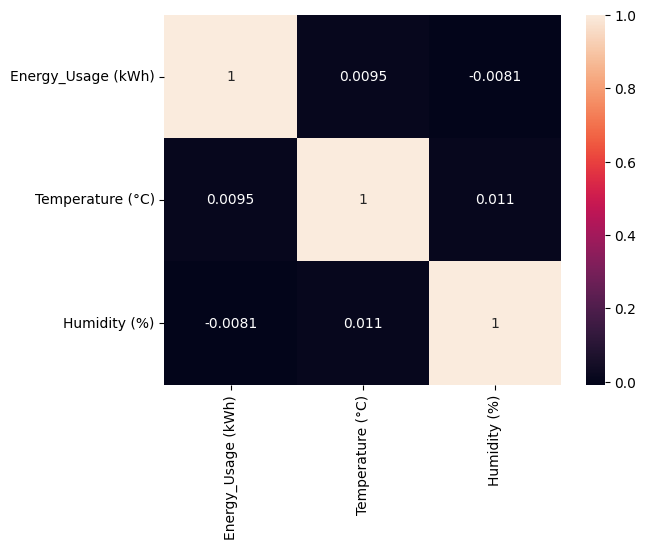

In [17]:
# df['Energy_Usage (kWh)'].corr(df['Temperature (°C)'])
s=df.select_dtypes(include="number").corr()# Compute correlation matrix for all numerical columns

sns.heatmap(s,annot=True)# Visualize the correlation matrix using a heatmap


In [18]:
df.select_dtypes(include=object).columns

Index(['Timestamp', 'Building_ID', 'Building_Type', 'Occupancy_Level'], dtype='object')

In [19]:
# Apply Label Encoding on 'Building_Type' column to convert categories into numerical codes
le=LabelEncoder()
df['Building_Type']=le.fit_transform(df[['Building_Type']])
df

e:\Programming\Building-s_Energy_Consumption_Prediction_Sytsem\Enter-week-1\mvenv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Timestamp,Building_ID,Energy_Usage (kWh),Temperature (°C),Humidity (%),Building_Type,Occupancy_Level
0,2025-01-01 00:00:00,B001,121.30,-7.20,79.36,2,Low
1,2025-01-01 01:00:00,B001,230.76,12.62,80.37,2,High
2,2025-01-01 02:00:00,B001,187.21,-1.33,37.74,2,High
3,2025-01-01 03:00:00,B001,262.23,0.24,39.97,2,High
4,2025-01-01 04:00:00,B001,472.97,5.44,89.29,2,Medium
...,...,...,...,...,...,...,...
7195,2025-01-15 19:00:00,B020,232.46,3.93,60.88,3,Medium
7196,2025-01-15 20:00:00,B020,479.36,-3.65,70.81,3,Medium
7197,2025-01-15 21:00:00,B020,300.84,20.53,40.00,3,Low
7198,2025-01-15 22:00:00,B020,156.19,-3.44,32.51,3,Medium


In [20]:
# Define order for Ordinal Encoding ('Low' < 'Medium' < 'High')
order1=[["Low","Medium","High"]]
oe=OrdinalEncoder(categories=order1)
df["Occupancy_Level"]=oe.fit_transform(df[["Occupancy_Level"]])
df

,Timestamp,Building_ID,Energy_Usage (kWh),Temperature (°C),Humidity (%),Building_Type,Occupancy_Level
0,2025-01-01 00:00:00,B001,121.30,-7.20,79.36,2,0.0
1,2025-01-01 01:00:00,B001,230.76,12.62,80.37,2,2.0
2,2025-01-01 02:00:00,B001,187.21,-1.33,37.74,2,2.0
3,2025-01-01 03:00:00,B001,262.23,0.24,39.97,2,2.0
4,2025-01-01 04:00:00,B001,472.97,5.44,89.29,2,1.0
...,...,...,...,...,...,...,...
7195,2025-01-15 19:00:00,B020,232.46,3.93,60.88,3,1.0
7196,2025-01-15 20:00:00,B020,479.36,-3.65,70.81,3,1.0
7197,2025-01-15 21:00:00,B020,300.84,20.53,40.00,3,0.0
7198,2025-01-15 22:00:00,B020,156.19,-3.44,32.51,3,1.0


In [21]:
# export the processed data to a new CSV file
# df.to_csv("../dataset/processed_data.csv",index=False)

In [22]:
df.columns

Index(['Timestamp', 'Building_ID', 'Energy_Usage (kWh)', 'Temperature (°C)',
       'Humidity (%)', 'Building_Type', 'Occupancy_Level'],
      dtype='object')

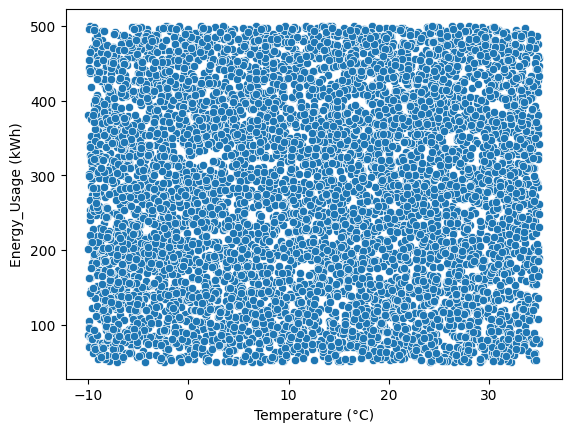

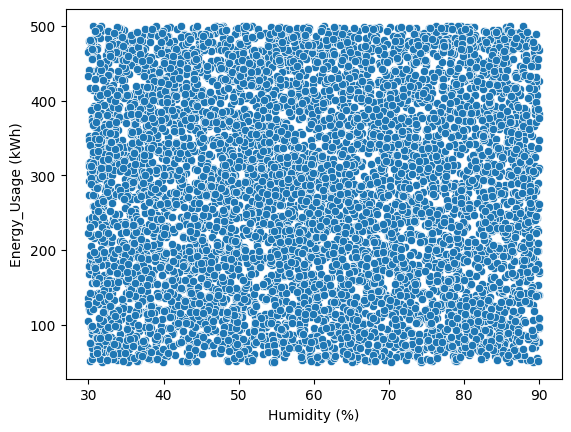

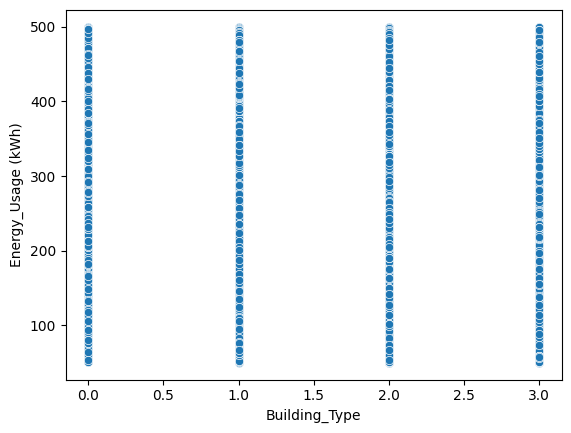

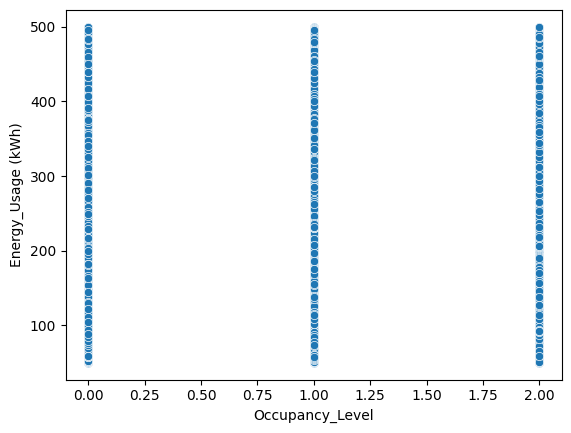

In [24]:
# Plot scatter plots to analyze relationship between temperature/humidity and energy usage
for col in ['Temperature (°C)',
       'Humidity (%)', 'Building_Type', 'Occupancy_Level']:
    sns.scatterplot(data=df,x=col,y='Energy_Usage (kWh)')
    plt.show()